In [1]:
# Separately make each plank area (could use cell rotate, but there is no region rotate.)
# Use a loop to make the planks in each area (translate region)
# Building from out -> in 

"""
A1,A2,A3: refer to different areas 
Outer hexagon: HO
Inner hecagon: HI
Diamond Plank Area: D 
Plank Area: P
Fuel Area: F 
Triso Particles: T
Spacers: S 
Control Rod Slot: CS
Control Rod Arm: CA 
"""

'\nA1,A2,A3: refer to different areas \nOuter hexagon: HO\nInner hecagon: HI\nDiamond Plank Area: D \nPlank Area: P\nFuel Area: F \nTriso Particles: T\nSpacers: S \nControl Rod Slot: CS\nControl Rod Arm: CA \n'

In [2]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import openmc
import openmc.model
from numpy import sin, cos, tan, pi
import operator
import openmc.mgxs as mgxs
import pandas as pd

In [3]:
openmc.__version__

'0.11.0'

In [4]:
# Materials 
uoc_9 = openmc.Material()
uoc_9.set_density('g/cc', 11)
uoc_9.add_nuclide('U235', 2.27325e-3)
uoc_9.add_nuclide('U238', 2.269476e-2)
uoc_9.add_nuclide('O16', 3.561871e-2)
uoc_9.add_nuclide('C0',9.79714e-3)
uoc_9.temperature = 1110

"""
uoc_19 = openmc.Material()
uoc_19.set_density('g/cc', 11)
uoc_19.add_nuclide('U235', 4.98781e-3)
uoc_19.add_nuclide('U238', 2.001094e-2)
uoc_19.add_nuclide('O16', 3.566255e-2)
uoc_19.add_nuclide('C12',9.80920e-3)"""

por_c = openmc.Material()
por_c.set_density('g/cc',1)
por_c.add_nuclide('C0',5.013980e-2)
por_c.temperature = 948

si_c = openmc.Material()
si_c.set_density('g/cc', 3.2)
si_c.add_nuclide('Si28', 4.431240e-2)
si_c.add_nuclide('Si29', 2.25887e-3)
si_c.add_nuclide('Si30', 1.48990e-3)
si_c.add_nuclide('C0', 4.806117e-2)
si_c.temperature = 948

graphite = openmc.Material()
graphite.set_density('g/cc', 1.8)
graphite.add_nuclide('C0', 9.025164e-2)
graphite.temperature = 948

p_graphite = openmc.Material()
p_graphite.set_density('g/cc', 1.8)
p_graphite.add_nuclide('C0', 9.025164e-2)
p_graphite.temperature = 948

s_graphite = openmc.Material()
s_graphite.set_density('g/cc', 1.8)
s_graphite.add_nuclide('C0', 9.025164e-2)
s_graphite.temperature = 948

lm_graphite = openmc.Material()
lm_graphite.set_density('g/cc', 1.8)
lm_graphite.add_nuclide('C0', 9.025164e-2)
lm_graphite.temperature = 948

flibe = openmc.Material()
flibe.set_density('g/cc',1.95)
flibe.add_nuclide('Li6',1.383014e-6)
flibe.add_nuclide('Li7',2.37132e-2)
flibe.add_nuclide('Be9',1.18573e-2)
flibe.add_nuclide('F19',4.74291e-2)
flibe.temperature = 948

mhc = openmc.Material()
mhc.set_density('g/cc', 10.28)
mhc.add_nuclide('Mo92', 9.328884e-3)
mhc.add_nuclide('Mo94', 5.850533e-3)
mhc.add_nuclide('Mo95', 1.010836e-2)
mhc.add_nuclide('Mo96', 1.061782e-2)
mhc.add_nuclide('Mo97', 6.102080e-3)
mhc.add_nuclide('Mo98', 1.546981e-2)
mhc.add_nuclide('Mo100', 6.205246e-3)
mhc.add_nuclide('Hf174', 6.659530e-7)
mhc.add_nuclide('Hf176', 2.189321e-5)
mhc.add_nuclide('Hf177', 7.741704e-5)
mhc.add_nuclide('Hf178', 1.135450e-4)
mhc.add_nuclide('Hf179', 5.668925e-5)
mhc.add_nuclide('Hf180', 1.460102e-4)
mhc.add_nuclide('C0', 5.154371e-4)
mhc.temperature = 948

"""
euo_s = openmc.Material()
euo_s.set_density('g/cc',5)
euo_s.add_nuclide('Eu151',8.179510e-3)
euo_s.add_nuclide('Eu153',8.932435e-3)
euo_s.add_nuclide('O16',2.56792e-2)"""

# how to determine wt% of density? 
#euo_p = openmc.Material()
#euo_p.set_density('g/cm3',0.0521)
#euo_p.add_nuclide('Eu151',8.179510e-3)
#euo_p.add_nuclide('Eu153',8.932435e-3)
#euo_p.add_nuclide('O16',2.56792e-2)

mats = openmc.Materials((uoc_9,por_c,si_c,graphite,p_graphite,lm_graphite,flibe,mhc,s_graphite))
mats.export_to_xml()

In [5]:
# constants
H_side = 22.5/np.sin(np.pi/3)

P_len = 23.1 # plank length
P_D_jut = 2-1.4948
P_D_jut_hyp = P_D_jut/sin(pi/3)
P_D_jut_adj = P_D_jut/sin(pi/3)
P_small_gap = 0.35
P_A1_height = 2.55
P_A1_adj = P_A1_height/tan(pi/3)
P_big_gap = 0.7

P_A2_hyp =  P_A1_height/sin(pi/3)
P_big_gap_A2_hyp = P_big_gap/sin(pi/3)
P_A3_hyp = P_A1_height/sin(pi/3)
P_big_gap_A3_hyp = P_big_gap/sin(pi/3)

D_to_center = 2
D_to_center_width = D_to_center*tan(pi/6)
D_A1_width = P_len - 2*(P_D_jut)
D_A1_height = 19.5
D_A1_adj = D_A1_height/np.tan(np.pi/3)

T_pitch = 0.09266

F_protect_gap = 0.1
F_width = T_pitch*(4)
F_len = T_pitch*(210)
F_A1_D_gap = (D_A1_width-F_len)/2
F_F_gap = P_A1_height - 2*F_width -2*F_protect_gap
F_F_gap_adj = F_F_gap/tan(pi/3)
F_A1_width_adj = F_width/tan(pi/3)
F_F_gap_A2_hyp = F_F_gap/sin(pi/3)
F_A2_width_hyp = F_width/sin(pi/3)
F_F_gap_A3_hyp = F_F_gap/sin(pi/3)
F_F_gap_A3_adj = F_F_gap_A3_hyp*cos(pi/3)
F_F_gap_A3_opp = F_F_gap_A3_hyp*sin(pi/3)
F_A3_width_adj = F_width*cos(pi/3)
F_A3_width_opp = F_width*sin(pi/3)

S_S_gap = 14
S_A1_D_gap = (D_A1_width-S_S_gap)/2
S_large_r = 0.7
S_small_r = 0.35

CS_l = 10.38
CS_w = 1.76
CA_l = 10
CA_w = 1 

In [6]:
# top and bottom surfaces (thin dz)
z_thickness = 101 # must be odd
top_surface = openmc.ZPlane(z0=T_pitch/2+(z_thickness-1)/2*T_pitch, boundary_type='reflective')
bot_surface = openmc.ZPlane(z0=-(T_pitch/2+(z_thickness-1)/2*T_pitch), boundary_type='reflective')

In [7]:
## Outermost Hexagon (only hexagon)
H_cell = openmc.Cell(fill=graphite)
H_cell.region = openmc.model.hexagonal_prism(
    edge_length=H_side,
    orientation = 'x',
    boundary_type='reflective') &-top_surface &+ bot_surface

In [8]:
def plane(m,x,y): 
    return openmc.Plane(a=-m,b=1,d=-m*x+y)

def region_maker(area,area_type):
    if area in ['A1','A3']:
        if V[area][area_type]['L']['m'] == 0.0 and V[area][area_type]['R']['m'] == 0.0: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +openmc.XPlane(x0=V[area][area_type]['L']['x']) &\
                     -openmc.XPlane(x0=V[area][area_type]['R']['x'])     
        else: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                     -plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
        
    elif area in ['A2']:
        region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                 +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                 -plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                 +plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
    else: 
        raise Exception('Your region type has yet to be defined.')
    return region 

def rx(x_i,y_i,t):
    return x_i*cos(t)-y_i*sin(t)

def ry(x_i,y_i,t):
    return x_i*sin(t)+y_i*cos(t)

In [9]:
# geometry for planes 

m1 = -D_A1_height/D_A1_adj
m2 = D_A1_width*np.sin(np.pi/3)/(D_A1_width*np.cos(np.pi/3))

V = {'A1':{},'A2':{},'A3':{}}

V['A1'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A2'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A3'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}

V['A1']['D']['T'] = {'m':0, 'x':0, 'y':-D_to_center}
V['A1']['D']['B'] = {'m':0, 'x':0, 'y':-D_to_center-D_A1_height}
V['A1']['D']['R'] = {'m':m1, 'x':-D_to_center_width, 'y':-D_to_center}
V['A1']['D']['L'] = {'m':m1, 'x':V['A1']['D']['R']['x']-D_A1_width, 'y':-D_to_center}

V['A1']['P']['T'] = {'m':0, 'x':0, 'y':V['A1']['D']['T']['y']-P_small_gap}
V['A1']['P']['B'] = {'m':0, 'x':0, 'y':V['A1']['P']['T']['y']-P_A1_height}
V['A1']['P']['R'] = {'m':m1, 'x':V['A1']['D']['R']['x']+P_small_gap*tan(pi/6)+P_D_jut_hyp, 'y':V['A1']['D']['R']['y']-P_small_gap}
V['A1']['P']['L'] = {'m':m1, 'x':V['A1']['D']['L']['x']+P_small_gap*tan(pi/6)-P_D_jut_hyp, 'y':V['A1']['D']['L']['y']-P_small_gap}

V['A1']['F']['T'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['P']['T']['y']-F_protect_gap}
V['A1']['F']['B'] = {'m':0, 'x':V['A1']['F']['T']['x'], 'y':V['A1']['F']['T']['y']-F_width}
V['A1']['F']['R'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['F']['T']['y']}
V['A1']['F']['L'] = {'m':0, 'x':V['A1']['D']['L']['x']+F_A1_D_gap, 'y':V['A1']['F']['T']['y']}

V['A1']['S']['C'] = {'x0':-D_to_center_width-S_A1_D_gap,'y0':-D_to_center-P_small_gap}
V['A1']['S']['Cb'] = {'x0':-D_to_center_width-S_A1_D_gap+P_A1_adj,'y0':-D_to_center-P_small_gap-P_A1_height}

V['A1']['CS']['T'] = {'m':0, 'x':0, 'y':CS_w/2}
V['A1']['CS']['B'] = {'m':0, 'x':0, 'y':-CS_w/2}
V['A1']['CS']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CS']['L'] = {'m':0, 'x':-CS_l, 'y':0}

V['A1']['CA']['T'] = {'m':0, 'x':0, 'y':CA_w/2}
V['A1']['CA']['B'] = {'m':0, 'x':0, 'y':-CA_w/2}
V['A1']['CA']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CA']['L'] = {'m':0, 'x':-CA_l, 'y':0}

A2_t = -pi/3*2
V['A2']['D']['T'] = {'m':0, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t)}
V['A2']['D']['B'] = {'m':0, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t)}
V['A2']['D']['R'] = {'m':m2, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t)}
V['A2']['D']['L'] = {'m':m2, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t)}

V['A2']['P']['T'] = {'m':0, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t)}
V['A2']['P']['B'] = {'m':0, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t)}
V['A2']['P']['R'] = {'m':m2, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t)}
V['A2']['P']['L'] = {'m':m2, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t)}

V['A2']['F']['T'] = {'m':-1/m2, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t)}
V['A2']['F']['B'] = {'m':-1/m2, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t)}
V['A2']['F']['R'] = {'m':m2, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t)}
V['A2']['F']['L'] = {'m':m2, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t)}

V['A2']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t)}
V['A2']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t)}

V['A2']['CS']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t), 'y':ry(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t)}
V['A2']['CS']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t), 'y':ry(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t)}
V['A2']['CS']['R'] = {'m':m2, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t), 'y':ry(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t)}
V['A2']['CS']['L'] = {'m':m2, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t), 'y':ry(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t)}

V['A2']['CA']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t)}
V['A2']['CA']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t)}
V['A2']['CA']['R'] = {'m':m2, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t)}
V['A2']['CA']['L'] = {'m':m2, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t)}

A3_t = pi/3*2
V['A3']['D']['T'] = {'m':m2, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t)}
V['A3']['D']['B'] = {'m':m2, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t)}
V['A3']['D']['R'] = {'m':m1, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t)}
V['A3']['D']['L'] = {'m':m1, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t)}

V['A3']['P']['T'] = {'m':m2, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t)}
V['A3']['P']['B'] = {'m':m2, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t)}
V['A3']['P']['R'] = {'m':m1, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t)}
V['A3']['P']['L'] = {'m':m1, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t)}

V['A3']['F']['T'] = {'m':-1/m1, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t)}
V['A3']['F']['B'] = {'m':-1/m1, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t)}
V['A3']['F']['R'] = {'m':m1, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t)}
V['A3']['F']['L'] = {'m':m1, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t)}

V['A3']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t)}
V['A3']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t)}

V['A3']['CS']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CS']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CS']['R'] = {'m':m1, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CS']['L'] = {'m':m1, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}

V['A3']['CA']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CA']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CA']['R'] = {'m':m1, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CA']['L'] = {'m':m1, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}


In [10]:
# Diamond Plank Area
A1_D_cell = openmc.Cell(fill=flibe)
A1_D_cell.region = region_maker('A1','D') &-top_surface &+ bot_surface

A2_D_cell = openmc.Cell(fill=flibe)
A2_D_cell.region = region_maker('A2','D') &-top_surface &+ bot_surface

A3_D_cell = openmc.Cell(fill=flibe)
A3_D_cell.region = region_maker('A3','D') &-top_surface &+ bot_surface

D_regions = A1_D_cell.region | A2_D_cell.region | A3_D_cell.region 
D_universe = openmc.Universe(cells=(A1_D_cell,A2_D_cell,A3_D_cell,))
D_areas = openmc.Cell(fill=D_universe,region=D_regions)
H_cell.region &= ~D_regions

In [11]:
# Graphite Planks 
all_P_univ = openmc.Universe()
all_P_regions = region_maker('A1','P') # initialize
T = {'A1':{'P':{},'F':{},'S':{}},'A2':{'P':{},'F':{},'S':{}},'A3':{'P':{},'F':{},'S':{}}}
T['A1']['P'] = {'x':(P_big_gap+P_A1_height)/tan(pi/3),'y':-(P_big_gap+P_A1_height)}
T['A2']['P'] = {'x':-P_A2_hyp-P_big_gap_A2_hyp, 'y':0}
T['A3']['P'] = {'x':(P_A3_hyp+P_big_gap_A3_hyp)*cos(pi/3), 'y':(P_A3_hyp+P_big_gap_A3_hyp)*sin(pi/3)}

for area in range(3):
    area_str = 'A{}'.format(area+1)
    P_region = region_maker(area_str,'P')
    P_cell = openmc.Cell(fill=p_graphite,region=P_region)
    P_univ = openmc.Universe(cells=(P_cell,))
    for trans in range(6):
        P_region_new = P_region.translate((trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0))
        P_cell_new = openmc.Cell(fill=P_univ,region=P_region_new)
        P_cell_new.translation = (trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0)
        all_P_univ.add_cell(P_cell_new)
        all_P_regions |= P_region_new
        D_areas.region &= ~P_region_new
        H_cell.region &= ~P_region_new
P_areas = openmc.Cell(fill=all_P_univ,region=all_P_regions&-top_surface &+ bot_surface)

In [12]:
# Triso Particles 
spheres = [openmc.Sphere(r=1e-5*r)
           for r in [2135., 3135., 3485., 3835., 4235,]]
triso_cells = [openmc.Cell(fill=uoc_9, region=-spheres[0]),
         openmc.Cell(fill=por_c, region=+spheres[0] & -spheres[1]),
         openmc.Cell(fill=graphite, region=+spheres[1] & -spheres[2]),
         openmc.Cell(fill=si_c, region=+spheres[2] & -spheres[3]),
         openmc.Cell(fill=graphite, region=+spheres[3] &-spheres[4]),
         openmc.Cell(fill=lm_graphite, region=+spheres[4])]
triso_univ = openmc.Universe(cells=triso_cells)
lm_graphite_cell = openmc.Cell(fill=lm_graphite)
lm_graphite_univ = openmc.Universe(cells=(lm_graphite_cell,))

u = triso_univ
lattice = openmc.RectLattice()
lattice.lower_left = (V['A1']['F']['L']['x'], V['A1']['F']['B']['y'],-(T_pitch/2+(z_thickness-1)/2*T_pitch))
lattice.pitch = (T_pitch, T_pitch,T_pitch)
lattice.outer = lm_graphite_univ
lattice_list = []
for z in range(z_thickness): 
    lattice_z_list = []
    for row in range(4):
        lattice_y_list = []
        for col in range(210):
            lattice_y_list.append(u)
        lattice_z_list.append(lattice_y_list)
    lattice_list.append(lattice_z_list)
        
lattice.universes = lattice_list

In [13]:
# Fuel Plank 
all_F_univ = openmc.Universe()
all_F_regions = region_maker('A1','F') # initialize
T['A1']['F'] = {'x':F_F_gap_adj+F_A1_width_adj, 'y':-F_F_gap-F_width}
T['A2']['F'] = {'x':-F_F_gap_A2_hyp-F_A2_width_hyp, 'y':0}
T['A3']['F'] = {'x':F_F_gap_A3_adj+F_A3_width_adj, 'y':F_F_gap_A3_opp+F_A3_width_opp}

for area in range(3): 
    area_str = 'A{}'.format(area+1)
    F_region = region_maker(area_str,'F')
    F_cell = openmc.Cell(fill=lm_graphite,)
    F_cell.fill = lattice
    F_univ = openmc.Universe(cells=(F_cell,))
    for t in range(6):
        for x in range(2):
            x_trans = t*T[area_str]['P']['x']
            y_trans = t*T[area_str]['P']['y']
            if x == 1:
                x_trans += T[area_str]['F']['x']
                y_trans += T[area_str]['F']['y']
            F_region_new = F_region.translate((x_trans,y_trans,0))
            F_cell_new = openmc.Cell(fill=F_univ,region=F_region_new)
            if area == 1: 
                F_cell_new.rotation = (0,0,-120)
            if area == 2: 
                F_cell_new.rotation = (0,0,120)
            F_cell_new.translation = (x_trans,y_trans,0)
            all_F_univ.add_cell(F_cell_new)
            all_F_regions |= F_region_new
            P_areas.region &= ~F_region_new 
            D_areas.region &= ~F_region_new
            H_cell.region &= ~F_region_new 
F_areas = openmc.Cell(fill=all_F_univ,region=all_F_regions&-top_surface &+ bot_surface)

In [14]:
# Spacer 
all_S_univ = openmc.Universe()
S_small_spacer_surf = openmc.ZCylinder(r=S_small_r,x0=-D_to_center_width-S_A1_D_gap,y0=-D_to_center-P_small_gap) # initialize 
all_S_regions = -S_small_spacer_surf & +plane(V['A1']['P']['T']['m'],V['A1']['P']['T']['x'],V['A1']['P']['T']['y'])
T['A1']['S'] = {'x':-S_S_gap, 'y':0}
T['A2']['S'] = {'x':S_S_gap*cos(pi/3), 'y':S_S_gap*sin(pi/3)}
T['A3']['S'] = {'x':S_S_gap*cos(pi/3), 'y':-S_S_gap*sin(pi/3)}

# outer loop is for 3 types of spacers, small top, big middle, small bottom 
rad = [S_small_r, S_large_r,S_small_r] 
start = [0,1,5]
end = [1,6,6]
C = ['C','C','Cb']
for y in range(3):      
    for area in range(3):
        area_str = 'A{}'.format(area+1)
        S_cylinder = openmc.ZCylinder(r=rad[y],x0=V[area_str]['S'][C[y]]['x0'],y0=V[area_str]['S'][C[y]]['y0']) 
        if area == 0:
            S_region = -S_cylinder & +plane(V[area_str]['P']['T']['m'],V[area_str]['P']['T']['x'],V[area_str]['P']['T']['y'])
            if y == 2: 
                S_region = -S_cylinder & -plane(V[area_str]['P']['B']['m'],V[area_str]['P']['B']['x'],V[area_str]['P']['B']['y'])
        if area == 1:
            S_region = -S_cylinder & -plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])   
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])
        if area == 2:
            S_region = -S_cylinder & -plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])     
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])
        S_cell = openmc.Cell(fill=s_graphite,region=S_region)
        S_univ = openmc.Universe(cells=(S_cell,))
        for trans in range(start[y],end[y]):
            for x in range(2):
                x_trans = trans*T[area_str]['P']['x']
                y_trans = trans*T[area_str]['P']['y']
                if x == 1:
                    x_trans += T[area_str]['S']['x']
                    y_trans += T[area_str]['S']['y']
                S_region_new = S_region.translate((x_trans,y_trans,0))
                S_cell_new = openmc.Cell(fill=S_univ,region=S_region_new)
                S_cell_new.translation = (x_trans,y_trans,0)
                all_S_univ.add_cell(S_cell_new)
                all_S_regions |= S_region_new
                F_areas.region &= ~S_region_new
                P_areas.region &= ~S_region_new
                D_areas.region &= ~S_region_new
                H_cell.region &= ~S_region_new
S_areas = openmc.Cell(fill=all_S_univ,region=all_S_regions&-top_surface &+ bot_surface)

In [15]:
# Control Rod Slot 

A1_CS_cell = openmc.Cell(fill=flibe)
A1_CS_cell.region = region_maker('A1','CS') &-top_surface &+ bot_surface

A2_CS_cell = openmc.Cell(fill=flibe)
A2_CS_cell.region = region_maker('A2','CS') &-top_surface &+ bot_surface

A3_CS_cell = openmc.Cell(fill=flibe)
A3_CS_cell.region = region_maker('A3','CS') &-top_surface &+ bot_surface

CS_regions = A1_CS_cell.region | A2_CS_cell.region | A3_CS_cell.region 
CS_universe = openmc.Universe(cells=(A1_CS_cell,A2_CS_cell,A3_CS_cell,))
CS_areas = openmc.Cell(fill=CS_universe,region=CS_regions)
S_areas.region &= ~CS_regions 
F_areas.region &= ~CS_regions 
P_areas.region &= ~CS_regions 
D_areas.region &= ~CS_regions 
H_cell.region &= ~CS_regions 

In [16]:
# Control Rod Arm
A1_CA_cell = openmc.Cell(fill=flibe)
A1_CA_cell.region = region_maker('A1','CA') &-top_surface &+ bot_surface

A2_CA_cell = openmc.Cell(fill=flibe)
A2_CA_cell.region = region_maker('A2','CA') &-top_surface &+ bot_surface

A3_CA_cell = openmc.Cell(fill=flibe)
A3_CA_cell.region = region_maker('A3','CA') &-top_surface &+ bot_surface

CA_regions = A1_CA_cell.region | A2_CA_cell.region | A3_CA_cell.region 
CA_universe = openmc.Universe(cells=(A1_CA_cell,A2_CA_cell,A3_CA_cell,))
CA_areas = openmc.Cell(fill=CA_universe,region=CA_regions)
CS_areas.region &= ~CA_regions
S_areas.region &= ~CA_regions 
F_areas.region &= ~CA_regions 
P_areas.region &= ~CA_regions 
D_areas.region &= ~CA_regions 
H_cell.region &= ~CA_regions 

In [17]:
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
geom = openmc.Geometry(root)
geom.export_to_xml()
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
#settings.source = src
settings.batches = 10
settings.inactive = 1
settings.particles = 100
settings.temperature = {'multipole':True,'method':'interpolation'}
settings.export_to_xml()

In [18]:
tallies_file = openmc.Tallies()

In [19]:
energy_groups = openmc.mgxs.EnergyGroups(group_edges=[1e-6, 20.0e6])
delayed_groups = list(range(1,7))
beta = mgxs.Beta(domain=root, energy_groups=energy_groups, delayed_groups=delayed_groups)
beta.nuclides = ['U235']
tallies_file += beta.tallies.values()

In [20]:
mesh_no = 0
for t in range(6):
    mesh_no += 1
    for x in range(2):
        x_trans = t*T['A1']['P']['x']
        y_trans = t*T['A1']['P']['y']
        if x == 1:
            mesh_no += 1
            x_trans += T['A1']['F']['x']
            y_trans += T['A1']['F']['y']
        mesh_c = openmc.RegularMesh(mesh_id=mesh_no)
        mesh_c.dimension = [1,5]
        mesh_c.lower_left = [V['A1']['F']['L']['x']+x_trans, 
                           V['A1']['F']['B']['y']+y_trans]
        mesh_c.upper_right = [V['A1']['F']['R']['x']+x_trans, 
                            V['A1']['F']['T']['y']+y_trans]
        mesh_filter_c = openmc.MeshFilter(mesh_c)
        tally_c = openmc.Tally(name='mesh tally c'+str(mesh_no))
        tally_c.filters = [mesh_filter_c]
        tally_c.scores = ['fission']
        tallies_file.append(tally_c)

In [21]:
energy_filter_d = openmc.EnergyFilter([1e-5, 3, 1.0e5,20.0e6])
mesh_d = openmc.RegularMesh(mesh_id=13)
mesh_d.dimension = [1,1]
L = 27.02
mesh_d.lower_left = [-L,-L]
mesh_d.upper_right = [L,L]
mesh_filter_d = openmc.MeshFilter(mesh_d)
tally_d = openmc.Tally(name='mesh tally d')
tally_d.filters = [mesh_filter_d, energy_filter_d]
tally_d.scores = ['flux','nu-fission','fission']
tallies_file.append(tally_d)

In [22]:
energy_filter_e = openmc.EnergyFilter([1e-5, 3, 0.1e6,20.0e6])
mesh_e = openmc.RegularMesh(mesh_id=14)
mesh_e.dimension = [100,100]
L = 27.02
mesh_e.lower_left = [-L,-L]
mesh_e.upper_right = [L,L]
mesh_filter_e = openmc.MeshFilter(mesh_e)
tally_e = openmc.Tally(name='mesh tally e')
tally_e.filters = [mesh_filter_e, energy_filter_e]
tally_e.scores = ['flux','nu-fission','fission']
tallies_file.append(tally_e)

In [23]:
engs = [1.00E-11,1.00E-10,5.00E-10,7.50E-10,1.00E-09,1.20E-09,
                                     1.50E-09,2.00E-09,2.50E-09,3.00E-09,4.00E-09,5.00E-09,
                                     7.50E-09,1.00E-08,2.53E-08,3.00E-08,4.00E-08,5.00E-08,
                                     6.00E-08,7.00E-08,8.00E-08,9.00E-08,1.00E-07,1.25E-07,
                                     1.50E-07,1.75E-07,2.00E-07,2.25E-07,2.50E-07,2.75E-07,
                                     3.00E-07,3.25E-07,3.50E-07,3.75E-07,4.00E-07,4.50E-07,
                                     5.00E-07,5.50E-07,6.00E-07,6.25E-07,6.50E-07,7.00E-07,
                                     7.50E-07,8.00E-07,8.50E-07,9.00E-07,9.25E-07,9.50E-07,
                                     9.75E-07,1.00E-06,1.01E-06,1.02E-06,1.03E-06,1.04E-06,
                                     1.05E-06,1.06E-06,1.07E-06,1.08E-06,1.09E-06,1.10E-06,
                                     1.11E-06,1.12E-06,1.13E-06,1.14E-06,1.15E-06,1.18E-06,
                                     1.20E-06,1.23E-06,1.25E-06,1.30E-06,1.35E-06,1.40E-06,
                                     1.45E-06,1.50E-06,1.59E-06,1.68E-06,1.77E-06,1.86E-06,
                                     1.94E-06,2.00E-06,2.12E-06,2.21E-06,2.30E-06,2.38E-06,
                                     2.47E-06,2.57E-06,2.67E-06,2.77E-06,2.87E-06,2.97E-06,
                                     3.00E-06,3.10E-06,3.20E-06,3.50E-06,3.73E-06,4.10E-06,
                                     4.70E-06,5.00E-06,5.40E-06,6.00E-06,6.25E-06,6.50E-06,
                                     6.75E-06,6.88E-06,7.00E-06,7.15E-06,8.10E-06,9.10E-06,
                                     1.00E-05,1.15E-05,1.19E-05,1.29E-05,1.44E-05,1.60E-05,
                                     1.70E-05,1.85E-05,1.94E-05,2.00E-05,2.05E-05,2.12E-05,
                                     2.18E-05,2.25E-05,2.50E-05,2.75E-05,3.00E-05,3.13E-05,
                                     3.18E-05,3.33E-05,3.38E-05,3.50E-05,3.55E-05,3.60E-05,
                                     3.70E-05,3.71E-05,3.73E-05,3.76E-05,3.80E-05,3.91E-05,
                                     3.96E-05,4.10E-05,4.24E-05,4.40E-05,4.52E-05,4.83E-05,
                                     5.06E-05,5.34E-05,5.80E-05,6.10E-05,6.30E-05,6.50E-05,
                                     6.75E-05,7.20E-05,7.60E-05,8.00E-05,8.17E-05,9.00E-05,
                                     9.70E-05,1.01E-04,1.05E-04,1.08E-04,1.13E-04,1.16E-04,
                                     1.18E-04,1.19E-04,1.22E-04,1.43E-04,1.70E-04,1.80E-04,
                                     1.88E-04,1.89E-04,1.92E-04,1.93E-04,2.02E-04,2.07E-04,
                                     2.10E-04,2.20E-04,2.40E-04,2.85E-04,3.05E-04,5.50E-04,
                                     6.70E-04,6.83E-04,9.50E-04,1.15E-03,1.50E-03,1.55E-03,
                                     1.80E-03,2.20E-03,2.25E-03,2.50E-03,3.00E-03,3.74E-03,
                                     3.90E-03,5.70E-03,8.03E-03,9.50E-03,1.30E-02,1.70E-02,
                                     2.00E-02,3.00E-02,4.50E-02,5.00E-02,5.20E-02,6.00E-02,
                                     7.30E-02,7.50E-02,8.20E-02,8.50E-02,1.00E-01,1.28E-01,
                                     1.49E-01,2.00E-01,2.70E-01,3.30E-01,4.00E-01,4.20E-01,
                                     4.40E-01,4.70E-01,4.92E-01,5.50E-01,5.73E-01,6.00E-01,
                                     6.70E-01,6.79E-01,7.50E-01,8.20E-01,8.61E-01,8.75E-01,
                                     9.00E-01,9.20E-01,1.01E+00,1.10E+00,1.20E+00,1.25E+00,
                                     1.32E+00,1.36E+00,1.40E+00,1.50E+00,1.85E+00,2.35E+00,
                                     2.48E+00,3.00E+00,4.30E+00,4.80E+00,6.43E+00,8.19E+00,
                                     1.00E+01,1.28E+01,1.38E+01,1.46E+01,1.57E+01,1.73E+01,
                                     2.00E+01]
engs = [x*1e6 for x in engs]
energy_filter_f = openmc.EnergyFilter(engs)
mesh_f = openmc.RegularMesh(mesh_id=15)
mesh_f.dimension = [1,1]
L = 27.02
mesh_f.lower_left = [-L,-L]
mesh_f.upper_right = [L,L]
mesh_filter_f = openmc.MeshFilter(mesh_f)
tally_f = openmc.Tally(name='mesh tally f')
tally_f.filters = [mesh_filter_f, energy_filter_f]
tally_f.scores = ['flux','nu-fission','fission']
tallies_file.append(tally_f)

In [24]:
tallies_file.export_to_xml()

/Users/gwenchee/anaconda3/envs/openmc-env/lib/python3.8/site-packages/openmc/mixin.py:71: IDWarning: Another Filter instance already exists with id=16.
  warn(msg, IDWarning)


In [25]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [26]:
# Load the last statepoint file
sp = openmc.StatePoint('statepoint.10.h5')

In [27]:
beta.load_from_statepoint(sp)
beta.build_hdf5_store(filename='mgxs', append=True)
df = beta.get_pandas_dataframe()
Beff = df['mean'].sum()
Beff

0.006536479483279178

In [28]:
region = ['1','2','3','4','5']
fission_rates = []
num = 1
for x in range(1,13): 
    mesh_tally = sp.get_tally(name='mesh tally c'+str(x))
    a = mesh_tally.get_pandas_dataframe()
    a = a.drop(columns=['mesh '+str(x),'nuclide','score'])
    if (x%2) == 0:
        num = int(x/2)
        stripe = [str(num)+'B']*5
    else:
        num = int((x+1)/2)
        stripe = [str(num)+'T']*5
    a['Region'] = region
    a['Stripe'] = stripe
    if x == 1: 
        df = a
    else:
        df = df.append(a)
    b = a['mean'].to_numpy()
    fission_rates.append(b)
df = df.set_index(['Stripe','Region'])

/Users/gwenchee/anaconda3/envs/openmc-env/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [29]:
ave = df['mean'].mean()
df['Fission Density'] = df['mean']/ave
ave_sd = np.sqrt(((df['mean'] - ave)**2).mean())
df['FD std dev'] = np.sqrt((df['std. dev.']/df['mean'])**2 + (ave_sd/ave)**2)

In [30]:
df

mean std. dev. Fission Density FD std dev
                                                            
Stripe Region                                               
1T     1       0.005166  0.000476        1.518703   0.319592
       2       0.003776  0.000535        1.110060   0.337285
       3       0.002033  0.000342        0.597776   0.349225
       4       0.004868  0.001181        1.431174   0.390508
       5       0.005931  0.001021        1.743471   0.351141
1B     1       0.004831  0.000562        1.420121   0.327410
       2       0.004342  0.000672        1.276468   0.342900
       3       0.002020  0.000254        0.593745   0.330907
       4       0.004348  0.000640        1.278074   0.339626
       5       0.005205  0.000594        1.530176   0.326612
2T     1       0.004399  0.000558        1.293190   0.331284
       2       0.004056  0.000579        1.192270   0.337653
       3       0.001891  0.000205        0.555842   0.324623
       4       0.003528  0.000444        1.037138   0.330932
       5       0.004238  0.000546        1.246008   0.332024
2B     1       0.003858  0.000444        1.134205   0.326987
       2       0.003438  0.000331        1.010591   0.320844
       3       0.001394  0.000237        0.409739   0.350146
       4       0.002829  0.000447        0.831729   0.344461
       5       0.004329  0.000413        1.272613   0.320548
3T     1       0.003695  0.000547        1.086235   0.339910
       2       0.003330  0.000306        0.979015   0.319533
       3       0.001777  0.000274        0.522430   0.342706
       4       0.003104  0.000326        0.912364   0.323582
       5       0.003770  0.000599        1.108415   0.344761
3B     1       0.004257  0.000446        1.251411   0.323467
       2       0.003364  0.000506        0.989042   0.341039
       3       0.001677  0.000219        0.493039   0.332704
       4       0.003376  0.000410        0.992595   0.329276
       5       0.003693  0.000418        1.085740   0.326281
4T     1       0.003622  0.000452        1.064854   0.330501
       2       0.003114  0.000292        0.915495   0.320056
       3       0.001254  0.000128        0.368522   0.322595
       4       0.003088  0.000261        0.907825   0.317470
       5       0.003959  0.000321        1.163817   0.316603
4B     1       0.004165  0.000404        1.224409   0.321045
       2       0.003462  0.000428        1.017733   0.330067
       3       0.001817  0.000221        0.534022   0.329289
       4       0.003574  0.000361        1.050805   0.322255
       5       0.003778  0.000380        1.110680   0.322109
5T     1       0.003594  0.000422        1.056529   0.327755
       2       0.003453  0.000421        1.015008   0.329458
       3       0.001744  0.000259        0.512794   0.340215
       4       0.003209  0.000203        0.943490   0.312481
       5       0.004146  0.000388        1.218842   0.319995
5B     1       0.003822  0.000331        1.123618   0.318068
       2       0.003228  0.000389        0.949004   0.328960
       3       0.001694  0.000190        0.497912   0.326043
       4       0.003091  0.000255        0.908562   0.316926
       5       0.003927  0.000382        1.154305   0.321094
6T     1       0.004044  0.000484        1.188942   0.328581
       2       0.003324  0.000403        0.977109   0.329182
       3       0.001389  0.000118        0.408353   0.317616
       4       0.003140  0.000368        0.923052   0.327722
       5       0.004136  0.000335        1.215751   0.316565
6B     1       0.004286  0.000569        1.259908   0.333616
       2       0.003684  0.000433        1.083053   0.327818
       3       0.001399  0.000168        0.411205   0.328792
       4       0.002740  0.000308        0.805417   0.326084
       5       0.003693  0.000450        1.085604   0.329395

In [31]:
mesh_tally_d = sp.get_tally(name='mesh tally d')
df_d = mesh_tally_d.get_pandas_dataframe()

In [32]:
df_d

mesh 13       energy low [eV] energy high [eV] nuclide       score     mean  \
        x  y  z                                                                 
0       1  1  1        1.00e-05         3.00e+00   total        flux 1.61e+02   
1       1  1  1        1.00e-05         3.00e+00   total  nu-fission 1.34e+00   
2       1  1  1        1.00e-05         3.00e+00   total     fission 5.50e-01   
3       1  1  1        3.00e+00         1.00e+05   total        flux 1.57e+02   
4       1  1  1        3.00e+00         1.00e+05   total  nu-fission 1.13e-01   
5       1  1  1        3.00e+00         1.00e+05   total     fission 4.63e-02   
6       1  1  1        1.00e+05         2.00e+07   total        flux 6.03e+01   
7       1  1  1        1.00e+05         2.00e+07   total  nu-fission 8.59e-03   
8       1  1  1        1.00e+05         2.00e+07   total     fission 3.23e-03   

  std. dev.  
             
0  4.56e+00  
1  5.01e-02  
2  2.06e-02  
3  1.26e+00  
4  1.82e-03  
5  7.46e-04  
6  6.91e-01  
7  4.18e-04  
8  1.46e-04

In [33]:
# flux units: particle-cm per source particle.
def flux_conv(df,sp_power,k):
    """Converts flux unit from [n/src] to [n/cm^2*s]

    Parameters
    ----------
    df: pandas dataframe with flux, nu-fission, and fission values
    sp_power: float 
        specific power of reactor [W/gU]
    k: keff 

    Returns
    -------
    flux: np.array(float)
        array of flux in [n/cm^*s] for each energy group
    flux_err: np.array(float)
        array of flux uncertainties in [n/cm^*s] for each energy group
    """
    P = np.array([245486.6796001383]*3)#reactor_power(sp_power)
    Q = np.array([3.2 * 1e-11]*3)# [J/fission]
    nu_fission = np.array(df[df['score'].str.match('nu-fission')]['mean'])
    fission = np.array(df[df['score'].str.match('fission')]['mean'])
    flux = np.array(df[df['score'].str.match('flux')]['mean'])
    nu_fission_err = np.array(df[df['score'].str.match('nu-fission')]['std. dev.'])
    fission_err = np.array(df[df['score'].str.match('fission')]['std. dev.'])
    flux_err = np.array(df[df['score'].str.match('flux')]['std. dev.'])
    nu = nu_fission/fission
    print(nu)
    k = np.array([k]*3)
    N = P*nu/(Q*k)
    V = 3 * np.sqrt(3) / 2 * H_side ** 2 * z_thickness * T_pitch
    flux = 1/ V * N * flux
    flux_err = (np.sqrt((nu_fission_err/nu_fission)**2+\
               (fission_err/fission)**2+(flux_err/flux)**2)) * \
               (1 / V * P / Q / k)         
    return flux, flux_err 

In [34]:
flux_conv(df_d,200,1.42807)

[2.43670002 2.43523686 2.6579253 ]


(array([1.28360218e+14, 1.24763101e+14, 5.24502413e+13]),
 array([1.72925892e+10, 7.46597032e+09, 2.17432599e+10]))

In [35]:
df_dd = pd.DataFrame(index=['E3','E2','E1'])
df_dd['flux'], df_dd['flux_err'] = flux_conv(df_d,200,1.42807)
df_dd['relative_err_p'] = df_dd['flux_err'] / df_dd['flux'] * 100
df_dd

[2.43670002 2.43523686 2.6579253 ]


,flux,flux_err,relative_err_p
E3,1.283602e+14,1.729259e+10,0.013472
E2,1.247631e+14,7.465970e+09,0.005984
E1,5.245024e+13,2.174326e+10,0.041455


In [36]:
mesh_tally_e = sp.get_tally(name='mesh tally e')
df_e = mesh_tally_e.get_pandas_dataframe()

In [37]:
df_e

mesh 14         energy low [eV] energy high [eV] nuclide       score  \
            x    y  z                                                        
0           1    1  1        1.00e-05         3.00e+00   total        flux   
1           1    1  1        1.00e-05         3.00e+00   total  nu-fission   
2           1    1  1        1.00e-05         3.00e+00   total     fission   
3           1    1  1        3.00e+00         1.00e+05   total        flux   
4           1    1  1        3.00e+00         1.00e+05   total  nu-fission   
...       ...  ... ..             ...              ...     ...         ...   
89995     100  100  1        3.00e+00         1.00e+05   total  nu-fission   
89996     100  100  1        3.00e+00         1.00e+05   total     fission   
89997     100  100  1        1.00e+05         2.00e+07   total        flux   
89998     100  100  1        1.00e+05         2.00e+07   total  nu-fission   
89999     100  100  1        1.00e+05         2.00e+07   total     fission   

          mean std. dev.  
                          
0     0.00e+00  0.00e+00  
1     0.00e+00  0.00e+00  
2     0.00e+00  0.00e+00  
3     0.00e+00  0.00e+00  
4     0.00e+00  0.00e+00  
...        ...       ...  
89995 0.00e+00  0.00e+00  
89996 0.00e+00  0.00e+00  
89997 0.00e+00  0.00e+00  
89998 0.00e+00  0.00e+00  
89999 0.00e+00  0.00e+00  

[90000 rows x 9 columns]

In [38]:
flux = mesh_tally_e.get_slice(scores=['flux'])
nu_fission = mesh_tally_e.get_slice(scores=['nu-fission'])
fission = mesh_tally_e.get_slice(scores=['fission'])
flux_conv = {}
eg_names = ['eg3','eg2','eg1']
egs = [(1e-5,3),(3,0.1e6),(0.1e6,20e6)]
P = 245486.6796001383
Q = 3.2 * 1e-11
k = 1.42807
V = 3 * np.sqrt(3) / 2 * H_side ** 2 * z_thickness * T_pitch/(100*100)
for x in range(3): 
    flux_eg = flux.get_slice(filters=[openmc.EnergyFilter], filter_bins=[(egs[x],)])
    nu_fiss_eg = nu_fission.get_slice(filters=[openmc.EnergyFilter], filter_bins=[(egs[x],)])
    fiss_eg = fission.get_slice(filters=[openmc.EnergyFilter], filter_bins=[(egs[x],)])
    nu = nu_fiss_eg.mean / fiss_eg.mean
    nu = np.nanmean(nu)
    print(nu)
    N = P*nu/(Q*k)
    flux_conv[eg_names[x]] = flux_eg.mean * 1/ V * N 
    flux_conv[eg_names[x]].shape = (100,100)
    flux_conv[eg_names[x]][np.isnan(flux_conv[eg_names[x]])] = 0

<ipython-input-38-64922ad3715e>:15: RuntimeWarning: invalid value encountered in true_divide
  nu = nu_fiss_eg.mean / fiss_eg.mean


2.4367000189036983
2.4347195917327245
2.6140441747200214


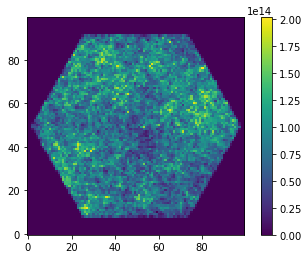

In [39]:
plt.figure()
plt.imshow(flux_conv['eg1'], interpolation='none', origin='lower')
plt.colorbar()
plt.show()

In [42]:
mesh_tally_f = sp.get_tally(name='mesh tally f')
df_f = mesh_tally_f.get_pandas_dataframe()

In [44]:
# flux units: particle-cm per source particle.
def flux_conv(df,sp_power,k):
    """Converts flux unit from [n/src] to [n/cm^2*s]

    Parameters
    ----------
    df: pandas dataframe with flux, nu-fission, and fission values
    sp_power: float 
        specific power of reactor [W/gU]
    k: keff 

    Returns
    -------
    flux: np.array(float)
        array of flux in [n/cm^*s] for each energy group
    flux_err: np.array(float)
        array of flux uncertainties in [n/cm^*s] for each energy group
    """
    no_egs = int(len(df)/3)
    P = np.array([245486.6796001383]*no_egs)#reactor_power(sp_power)
    Q = np.array([3.2 * 1e-11]*no_egs)# [J/fission]
    nu_fission = np.array(df[df['score'].str.match('nu-fission')]['mean'])
    fission = np.array(df[df['score'].str.match('fission')]['mean'])
    flux = np.array(df[df['score'].str.match('flux')]['mean'])
    nu_fission_err = np.array(df[df['score'].str.match('nu-fission')]['std. dev.'])
    fission_err = np.array(df[df['score'].str.match('fission')]['std. dev.'])
    flux_err = np.array(df[df['score'].str.match('flux')]['std. dev.'])
    nu = nu_fission/fission
    k = np.array([k]*no_egs)
    N = P*nu/(Q*k)
    V = 3 * np.sqrt(3) / 2 * H_side ** 2 * z_thickness * T_pitch
    flux = 1/ V * N * flux
    flux[np.isnan(flux)] = 0
    flux_err = (np.sqrt((nu_fission_err/nu_fission)**2+\
               (fission_err/fission)**2+(flux_err/flux)**2)) * \
               (1 / V * P / Q / k)
    flux_err[np.isnan(flux_err)] = 0
    return flux, flux_err

In [45]:
index_list = []
for x in range(252):
    index_list += ['E'+str(x+1)]
    
df_ff = pd.DataFrame(index=index_list)

df_ff['flux'], df_ff['flux_err'] = flux_conv(df_f,200,1.42807)

<ipython-input-44-ff3d5dacf301>:28: RuntimeWarning: invalid value encountered in true_divide
  nu = nu_fission/fission
<ipython-input-44-ff3d5dacf301>:34: RuntimeWarning: invalid value encountered in true_divide
  flux_err = (np.sqrt((nu_fission_err/nu_fission)**2+\
<ipython-input-44-ff3d5dacf301>:35: RuntimeWarning: invalid value encountered in true_divide
  (fission_err/fission)**2+(flux_err/flux)**2)) * \
<ipython-input-44-ff3d5dacf301>:35: RuntimeWarning: divide by zero encountered in true_divide
  (fission_err/fission)**2+(flux_err/flux)**2)) * \


Text(0, 0.5, 'flux [$n/cm^2s$]')

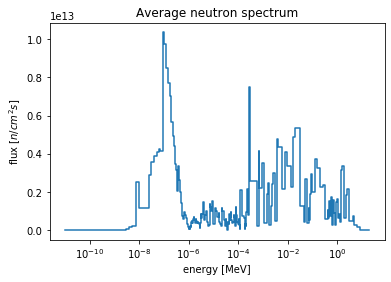

In [46]:
fluxvals = np.append(np.array(df_ff['flux']),np.array(df_ff['flux'])[0])
plt.semilogx(np.array(engs)/1e6,fluxvals,drawstyle='steps')
plt.title('Average neutron spectrum')
plt.xlabel('energy [MeV]')
plt.ylabel('flux [$n/cm^2s$]')